<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/Project4__Music_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Popularity Prediction

This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.


The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song. It might help to imagine that the song will not be released for several weeks.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.

Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

This is a supervised learning problem because we are using labeled data (song features with known popularity scores)

This is a regression problem since target variable (song popularity) is continuous

## Data Collection/Sources


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
import seaborn as sns
import pickle
import graphviz
from IPython.display import display
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
music_df=pd.read_csv(' https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv')

In [ ]:
music_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
music_df.shape

(1556, 23)

## Data Cleaning


In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
music_df.tail()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",...,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [ ]:
#Create a back up before cleaning data
music_copy=music_df.copy()
music_copy.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


Check for unique identifiers in a dataset, we can look for columns where all values are unique

In [ ]:
music_df.describe(include='all')

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
count,1556.000000,1556.000000,1556.000000,1556,1556,1556,1556,1556,1556,1556,...,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556
unique,NaN,NaN,NaN,83,1556,1556,716,600,1517,395,...,530,575,1394,772,965,606,1461,1486,732,13
top,NaN,NaN,NaN,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,,[],...,,,,0.102,,0.103,,,,C#/Db
freq,NaN,NaN,NaN,89,1,1,52,52,11,75,...,11,11,11,15,11,23,11,11,11,214
mean,778.500000,87.744216,10.668380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,449.322824,58.147225,16.360546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,389.750000,37.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,778.500000,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1167.250000,137.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identify potential unique identifier columns
unique_cols = [col for col in music_df.columns if music_df[col].nunique() == len(music_df)]

# Display the unique identifier columns
print("Potential Unique Identifier Columns:", unique_cols)

Potential Unique Identifier Columns: ['Index', 'Song Name', 'Streams']


Let's drop these unnecessary columns

In [ ]:
columns_to_drop=['Index', 'Song Name', 'Streams']
music_cleaned=music_df.drop(columns=columns_to_drop)
#Display the updated dataset information
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Artist                     1556 non-null   object
 4   Artist Followers           1556 non-null   object
 5   Song ID                    1556 non-null   object
 6   Genre                      1556 non-null   object
 7   Release Date               1556 non-null   object
 8   Weeks Charted              1556 non-null   object
 9   Popularity                 1556 non-null   object
 10  Danceability               1556 non-null   object
 11  Energy                     1556 non-null   object
 12  Loudness                   1556 non-null   object
 13  Speechiness                1556 non-null   object
 14  Acoustic

Check for missing values in each of the column

In [ ]:
music_cleaned.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


Most of the object type columns are in numerical format.Let's convert those columns to numeric format

In [ ]:
# Clean numeric columns
columns_to_convert = [
     'Artist Followers', 'Popularity', 'Danceability', 'Energy',
    'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence'
]

for col in columns_to_convert:
   music_cleaned[col] = music_cleaned[col].str.replace(',', '', regex=False)
   music_cleaned[col] = pd.to_numeric(music_cleaned[col], errors='coerce')

In [ ]:
music_cleaned.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,3,2021-07-23--2021-07-30,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,3,5,2021-07-02--2021-07-09,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,1,2021-07-23--2021-07-30,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [ ]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Artist                     1556 non-null   object 
 4   Artist Followers           1545 non-null   float64
 5   Song ID                    1556 non-null   object 
 6   Genre                      1556 non-null   object 
 7   Release Date               1556 non-null   object 
 8   Weeks Charted              1556 non-null   object 
 9   Popularity                 1545 non-null   float64
 10  Danceability               1545 non-null   float64
 11  Energy                     1545 non-null   float64
 12  Loudness                   1545 non-null   float64
 13  Speechiness                1545 non-null   float

In [ ]:
music_cleaned.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Artist,0
Artist Followers,11
Song ID,0
Genre,0
Release Date,0
Weeks Charted,0
Popularity,11


Since the no of rows having null value is small,let's drop the rows with null values

In [ ]:
# Drop rows with any NaN values in important columns
music_cleaned.dropna(subset=[
    'Artist Followers','Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Liveness', 'Tempo', 'Duration (ms)', 'Valence'
], inplace=True)

In [ ]:
print(music_cleaned.isnull().sum().sum())

0


In [ ]:
# Convert Release Date to datetime and extract Year and Month
music_cleaned['Release Date'] = pd.to_datetime(music_cleaned['Release Date'], errors='coerce')
music_cleaned['Release Year'] = music_cleaned['Release Date'].dt.year
music_cleaned['Release Month'] = music_cleaned['Release Date'].dt.month

In [ ]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  1545 non-null   int64         
 1   Number of Times Charted    1545 non-null   int64         
 2   Week of Highest Charting   1545 non-null   object        
 3   Artist                     1545 non-null   object        
 4   Artist Followers           1545 non-null   float64       
 5   Song ID                    1545 non-null   object        
 6   Genre                      1545 non-null   object        
 7   Release Date               1528 non-null   datetime64[ns]
 8   Weeks Charted              1545 non-null   object        
 9   Popularity                 1545 non-null   float64       
 10  Danceability               1545 non-null   float64       
 11  Energy                     1545 non-null   float64       
 12  Loudness   

In [ ]:
music_cleaned.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0
Release Date,17
Weeks Charted,0
Popularity,0


In [ ]:
music_cleaned[music_cleaned['Release Date'].isna()]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year,Release Month
158,19,18,2021-04-23--2021-04-30,AURORA,1687399.0,0TCmhnbMpw5zwPsTvlXTJi,"['art pop', 'norwegian pop']",NaT,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,77.0,...,-10.340,0.0356,0.634000,0.1030,115.010,248827.0,0.130,B,NaN,NaN
236,194,4,2020-10-09--2020-10-16,Oasis,6475631.0,7ygpwy2qP3NbrxVkHvUhXY,"['beatlesque', 'britpop', 'madchester', 'perma...",NaT,2021-07-09--2021-07-16\n2021-05-28--2021-06-04...,78.0,...,-4.097,0.0406,0.000509,0.1870,174.323,258773.0,0.434,D,NaN,NaN
514,152,23,2021-01-29--2021-02-05,Lil Peep,7535054.0,30bqVoKjX479ab90a8Pafp,"['emo rap', 'lgbtq+ hip hop']",NaT,2021-03-05--2021-03-12\n2021-02-26--2021-03-05...,82.0,...,-9.934,0.0616,0.096700,0.1150,93.099,142000.0,0.323,E,NaN,NaN
552,193,1,2021-02-12--2021-02-19,Oasis,6478565.0,7ygpwy2qP3NbrxVkHvUhXY,"['beatlesque', 'britpop', 'madchester', 'perma...",NaT,2021-02-12--2021-02-19,78.0,...,-4.097,0.0406,0.000509,0.1870,174.323,258773.0,0.434,D,NaN,NaN
631,16,6,2020-12-18--2020-12-25,The Ronettes,1251372.0,5ASM6Qjiav2xPe7gRkQMsQ,[],NaT,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,50.0,...,-7.013,0.0287,0.403000,0.3160,91.751,181267.0,0.853,D,NaN,NaN
637,32,5,2020-12-18--2020-12-25,Nat King Cole,1634288.0,4PS1e8f2LvuTFgUs1Cn3ON,"['adult standards', 'lounge', 'soul', 'vocal j...",NaT,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,53.0,...,-15.231,0.0341,0.920000,0.1380,78.696,192160.0,0.209,C#/Db,NaN,NaN
648,69,6,2020-12-18--2020-12-25,Darlene Love,1251372.0,46pF1zFimM582ss1PrMy68,[],NaT,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,45.0,...,-7.146,0.0530,0.395000,0.0773,126.627,166453.0,0.360,G#/Ab,NaN,NaN
669,126,1,2020-12-18--2020-12-25,"Eartha Kitt, Henri Rene & His Orchestra",127251.0,1foCxQtxBweJtZmdxhEHVO,"['adult standards', 'lounge', 'torch song', 'v...",NaT,2020-12-18--2020-12-25,41.0,...,-12.346,0.0607,0.902000,0.1850,84.485,206067.0,0.490,G#/Ab,NaN,NaN
670,127,1,2020-12-18--2020-12-25,"Mykola Dmytrovych Leontovych, John Williams",1024868.0,4tHqQMWSqmL6YjXwsqthDI,['soundtrack'],NaT,2020-12-18--2020-12-25,51.0,...,-22.507,0.0448,0.994000,0.1790,46.718,85267.0,0.800,G#/Ab,NaN,NaN
675,145,1,2020-12-18--2020-12-25,Bruce Springsteen,4224071.0,6s2wpWPFPAgKg2LXxi1Oee,"['classic rock', 'heartland rock', 'mellow gol...",NaT,2020-12-18--2020-12-25,44.0,...,-8.444,0.0479,0.362000,0.7270,139.986,267600.0,0.407,C,NaN,NaN


It looks like some of the dates were not following the pattern.Let's drop those rows with null values.

In [ ]:
# Drop rows with any NaN values in important columns
music_cleaned.dropna(subset=[
    'Release Date', 'Release Year','Release Month'
], inplace=True)

In [ ]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  1528 non-null   int64         
 1   Number of Times Charted    1528 non-null   int64         
 2   Week of Highest Charting   1528 non-null   object        
 3   Artist                     1528 non-null   object        
 4   Artist Followers           1528 non-null   float64       
 5   Song ID                    1528 non-null   object        
 6   Genre                      1528 non-null   object        
 7   Release Date               1528 non-null   datetime64[ns]
 8   Weeks Charted              1528 non-null   object        
 9   Popularity                 1528 non-null   float64       
 10  Danceability               1528 non-null   float64       
 11  Energy                     1528 non-null   float64       
 12  Loudness   

In [ ]:
# Clean Genre column (convert list-like strings to actual values)
music_cleaned['Genre'] = music_cleaned['Genre'].str.strip("[]").str.replace("'", "").str.split(", ")
music_cleaned = music_cleaned.explode('Genre')

In [ ]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4584 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  4584 non-null   int64         
 1   Number of Times Charted    4584 non-null   int64         
 2   Week of Highest Charting   4584 non-null   object        
 3   Artist                     4584 non-null   object        
 4   Artist Followers           4584 non-null   float64       
 5   Song ID                    4584 non-null   object        
 6   Genre                      4584 non-null   object        
 7   Release Date               4584 non-null   datetime64[ns]
 8   Weeks Charted              4584 non-null   object        
 9   Popularity                 4584 non-null   float64       
 10  Danceability               4584 non-null   float64       
 11  Energy                     4584 non-null   float64       
 12  Loudness   

In [ ]:
music_cleaned['Genre'].value_counts()

,count
Genre,
pop,483
rap,309
dance pop,255
post-teen pop,254
pop rap,162
...,...
perreo,1
moombahton,1
new orleans rap,1


In [ ]:
mean_popularity = music_cleaned.groupby('Genre')['Popularity'].mean()
music_cleaned['Genre_encoded'] = music_cleaned['Genre'].map(mean_popularity)

In [ ]:
music_cleaned.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,...,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year,Release Month,Genre_encoded
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,...,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0,12.0,90.500000
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,italian pop,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,...,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0,12.0,76.363636
1,2,3,2021-07-23--2021-07-30,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,...,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,2021.0,7.0,81.222222
2,1,11,2021-06-25--2021-07-02,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,...,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,2021.0,5.0,73.062112
3,3,5,2021-07-02--2021-07-09,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,...,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,2021.0,6.0,73.062112


In [ ]:
music_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4584 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  4584 non-null   int64         
 1   Number of Times Charted    4584 non-null   int64         
 2   Week of Highest Charting   4584 non-null   object        
 3   Artist                     4584 non-null   object        
 4   Artist Followers           4584 non-null   float64       
 5   Song ID                    4584 non-null   object        
 6   Genre                      4584 non-null   object        
 7   Release Date               4584 non-null   datetime64[ns]
 8   Weeks Charted              4584 non-null   object        
 9   Popularity                 4584 non-null   float64       
 10  Danceability               4584 non-null   float64       
 11  Energy                     4584 non-null   float64       
 12  Loudness   

In [ ]:
music_cleaned['Chord'].unique()

array(['B', 'C#/Db', 'A', 'D#/Eb', 'G#/Ab', 'F#/Gb', 'C', 'D', 'A#/Bb',
       'G', 'E', 'F'], dtype=object)

In [ ]:
# One-hot encode Chord column
music_encoded = pd.get_dummies(music_cleaned, columns=['Chord'], prefix='Chord')

In [ ]:
music_encoded.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,...,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,...,True,False,False,False,False,False,False,False,False,False
0,1,8,2021-07-23--2021-07-30,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,italian pop,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,...,True,False,False,False,False,False,False,False,False,False
1,2,3,2021-07-23--2021-07-30,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,...,False,False,True,False,False,False,False,False,False,False
2,1,11,2021-06-25--2021-07-02,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,...,False,False,False,False,False,False,False,False,False,False
3,3,5,2021-07-02--2021-07-09,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
music_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4584 entries, 0 to 1555
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  4584 non-null   int64         
 1   Number of Times Charted    4584 non-null   int64         
 2   Week of Highest Charting   4584 non-null   object        
 3   Artist                     4584 non-null   object        
 4   Artist Followers           4584 non-null   float64       
 5   Song ID                    4584 non-null   object        
 6   Genre                      4584 non-null   object        
 7   Release Date               4584 non-null   datetime64[ns]
 8   Weeks Charted              4584 non-null   object        
 9   Popularity                 4584 non-null   float64       
 10  Danceability               4584 non-null   float64       
 11  Energy                     4584 non-null   float64       
 12  Loudness   

Week of Highest Charting, Song ID and Weeks Charted are not very relevant and hence let's not drop them our model.Artist name is not directly usable for our model and hence can be dropped for now.Also,since we have extracted the Release Year and Release Month from Release Date column let's drop Release Date column and the Genre column before encoding as well.



In [ ]:
#Drop the specified columns
columns_to_drop=['Week of Highest Charting','Song ID','Weeks Charted','Release Date','Genre','Artist']
music_final=music_encoded.drop(columns=columns_to_drop)

# Display the updated dataset information
music_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4584 entries, 0 to 1555
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  4584 non-null   int64  
 1   Number of Times Charted    4584 non-null   int64  
 2   Artist Followers           4584 non-null   float64
 3   Popularity                 4584 non-null   float64
 4   Danceability               4584 non-null   float64
 5   Energy                     4584 non-null   float64
 6   Loudness                   4584 non-null   float64
 7   Speechiness                4584 non-null   float64
 8   Acousticness               4584 non-null   float64
 9   Liveness                   4584 non-null   float64
 10  Tempo                      4584 non-null   float64
 11  Duration (ms)              4584 non-null   float64
 12  Valence                    4584 non-null   float64
 13  Release Year               4584 non-null   float64
 1

## Exploratory Data Analysis


Text(0.5, 1.0, 'Distribution of Song Popularity')

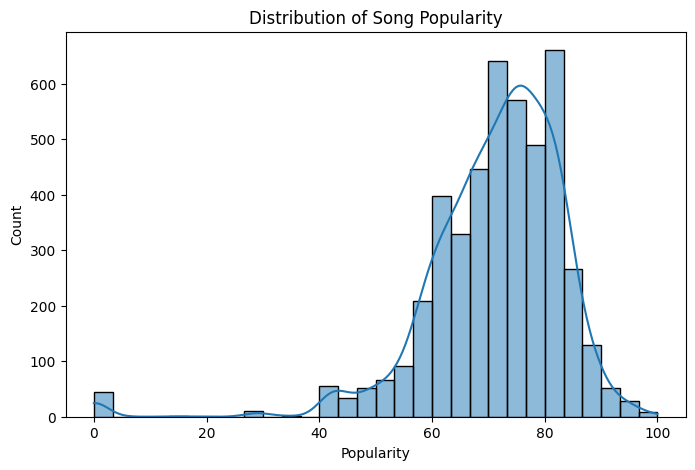

In [ ]:
# Create EDA plots
plt.figure(figsize=(8, 5))
# Plot 1: Distribution of Popularity
sns.histplot(music_final['Popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')

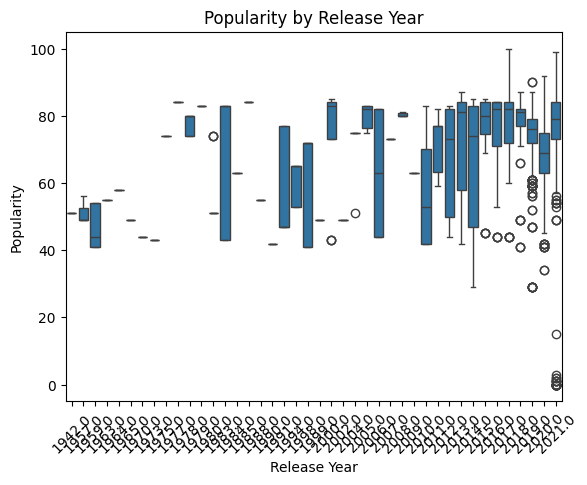

In [ ]:
# Plot 2: Boxplot of Popularity by Release Year
sns.boxplot(x='Release Year', y='Popularity', data=music_final)
plt.title('Popularity by Release Year')
plt.tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Energy vs Popularity')

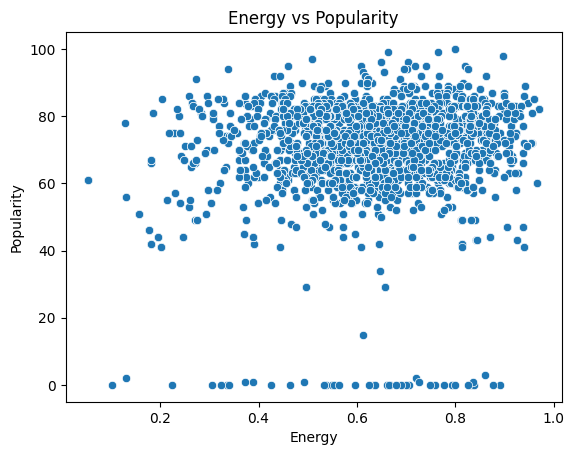

In [ ]:
#Energy vs Popularity (non-linear?)
sns.scatterplot(x='Energy', y='Popularity', data=music_final)
plt.title('Energy vs Popularity')

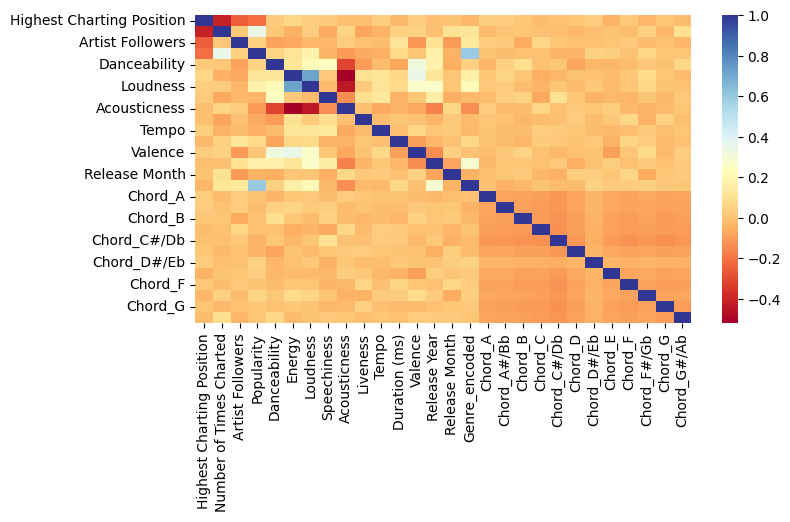

In [ ]:
corr=music_final.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False);

Text(0.5, 1.0, 'Popularity Density by Danceability & Energy')

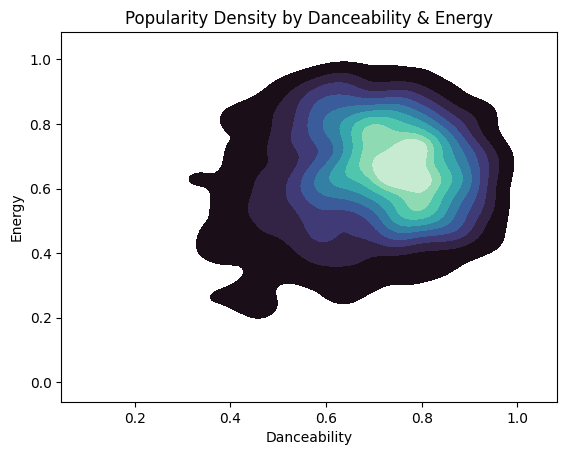

In [ ]:
#2D Heatmap of Danceability & Energy vs Popularity
sns.kdeplot(
    data=music_final, x='Danceability', y='Energy', weights=music_final['Popularity'],
    cmap='mako', fill=True
)
plt.title('Popularity Density by Danceability & Energy')

No strong linear relationship is obtained from any of the plots and hence let's proceed using a tree-based regression model

## Processing


###Decision Tree Regression

In [ ]:
# Define features and target
X = music_final.drop('Popularity', axis = 1)
y = music_final['Popularity']

In [ ]:
numLoops = 100

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")


CV RMSE: 7080.0


In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,11.107021,0.338254
1,2,9.436362,0.385252
2,3,7.747368,0.373268
3,4,7.051919,0.351365
4,5,6.734496,0.381355
5,6,6.482705,0.393958
6,7,6.076799,0.385786
7,8,5.690789,0.455468
8,9,5.307025,0.491875
9,10,4.986202,0.483170


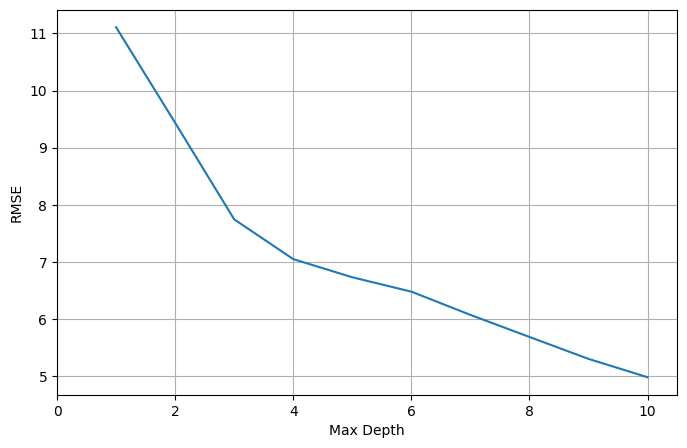

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
# Re run with max depth = 5
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5 )
  model = DecisionTreeRegressor( max_depth=5 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")

CV RMSE: 6770.0


Visualize the decision tree

In [ ]:
import graphviz
from IPython.display import display
from sklearn import tree

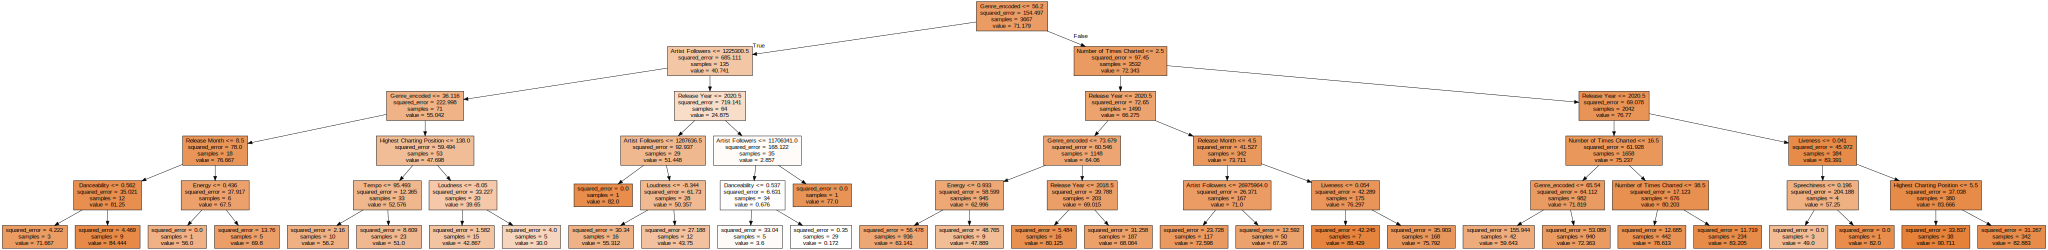

In [ ]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)


###Random Forest

In [ ]:
# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

# np.random.seed(42)
for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )
  model = RandomForestRegressor( n_estimators = 10 ) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  mean_error[idx] = mean_squared_error( y_test, y_pred )

print(f'RMSE: {np.sqrt(mean_error).mean()*1000}')
print(f'RMSE_std: {np.sqrt(mean_error).std()*1000}')
np.sqrt(mean_error)[:50]

RMSE: 3185.9981987127067
RMSE_std: 358.42465986050235


array([3.08137898, 4.46970903, 3.25564521, 3.47429414, 2.5836454 ,
       2.76467237, 2.95868498, 2.70093485, 3.17072384, 2.90277947,
       3.13665667, 3.18375443, 3.04904833, 3.2976496 , 2.75507463,
       3.01884665, 3.46428262, 2.92385928, 2.41621657, 2.85248175,
       2.63606188, 3.16034073, 3.47153246, 3.71956424, 2.95871078,
       3.00182424, 3.00520813, 3.95007972, 3.08944451, 2.79114506,
       3.48845111, 3.17143397, 4.20232708, 3.20017039, 3.5792142 ,
       3.17395171, 2.92385742, 3.84161197, 3.07147676, 3.33314049,
       3.30267893, 3.16721035, 2.80284168, 2.95045974, 3.4072858 ,
       3.02461728, 3.5114814 , 3.48961694, 3.00058337, 2.80087811])

In [ ]:
num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


In [ ]:
pickle.dump(rfModel, open('rfModel.p','wb'))


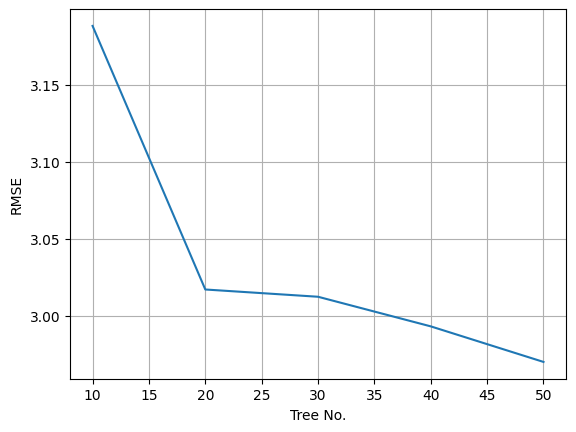

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()


In [ ]:
pd.DataFrame({
    'n_estimators': list(num_trees),
    'mean_RMSE': rmse_results,
    'std_RMSE': std_results
})

,n_estimators,mean_RMSE,std_RMSE
0,10,3.188023,0.396323
1,20,3.017009,0.373591
2,30,3.012298,0.371460
3,40,2.993085,0.349938
4,50,2.970017,0.358855


Mean RMSE and std deviation is decreasing as the number of trees increases.

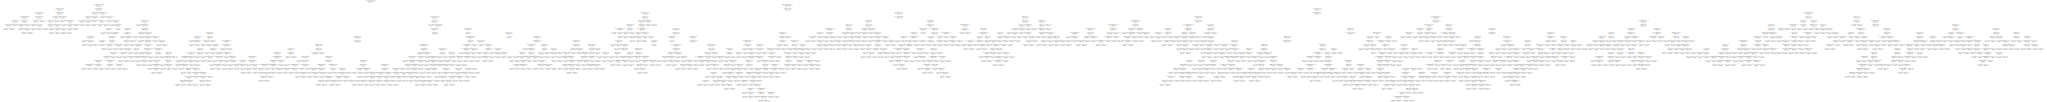

In [ ]:
# Display one tree from the random forest
display(
  graphviz.Source(
    tree.export_graphviz(
      rfModel.estimators_[0],
      feature_names = X.columns,
    )
  )
)

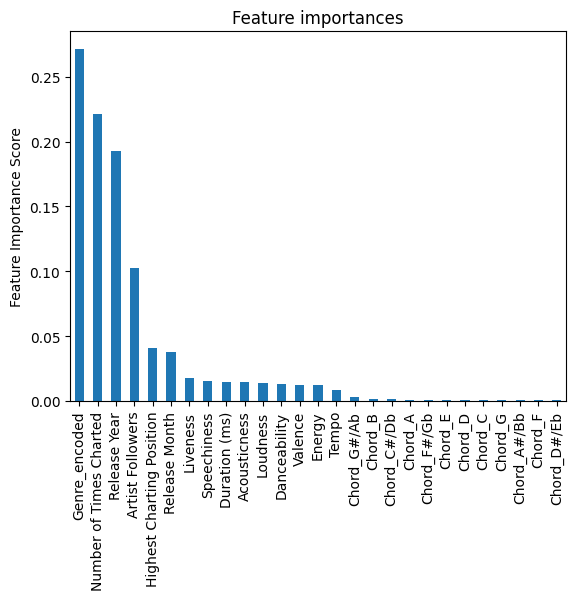

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series( importances, index = X.columns )

plt.figure()
# forest_importances.plot.bar()
forest_importances.sort_values( ascending = False ).plot.bar()
plt.title("Feature importances")
plt.ylabel('Feature Importance Score') ;

In [ ]:
( forest_importances.sort_values( ascending = False ) * 100 ).cumsum()

,0
Genre_encoded,27.134480
Number of Times Charted,49.232167
Release Year,68.472243
Artist Followers,78.706040
Highest Charting Position,82.783112
Release Month,86.584735
Liveness,88.322306
Speechiness,89.846464
Duration (ms),91.278463
Acousticness,92.706925


It looks some of the features like Chord are not important.Let's rerun the model using important features.

####Feature Selection

In [ ]:
# Number of top features to use
top_n = 10

top_features = forest_importances.sort_values( ascending = False ).abs().sort_values(ascending=False).head(10).index

print("Top correlated features with Popularity:\n", top_features)


Top correlated features with Popularity:
 Index(['Genre_encoded', 'Number of Times Charted', 'Release Year',
       'Artist Followers', 'Highest Charting Position', 'Release Month',
       'Liveness', 'Speechiness', 'Duration (ms)', 'Acousticness'],
      dtype='object')


In [ ]:
# Rebuild dataset with top N features only
X_top = music_final[top_features]
y_top = music_final['Popularity']

# Split into train/test
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

# Train new Random Forest with top features
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)

# Cross-validation
cv_scores_top = cross_val_score(rf_top, X_train_top, y_train_top, cv=100, scoring='neg_root_mean_squared_error')
print(f"CV RMSE (Top {top_n} Features): {-cv_scores_top.mean()*1000:.4f}")

# Evaluate on test set
y_pred_top = rf_top.predict(X_test_top)
mse = mean_squared_error(y_test_top, y_pred_top)
test_rmse_top = np.sqrt(mse)
print(f"Test RMSE (Top {top_n} Features): {test_rmse_top*1000:.4f}")


CV RMSE (Top 10 Features): 2774.1327
Test RMSE (Top 10 Features): 2796.4259


###XG Boost

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()*1000}')

RMSE: 2698.9008989145586


In [ ]:
# Specify the parameters you want to try and their ranges.
param_test = {
 'max_depth'     : [ 3, 4, 5, 6, 7 ],
 'learning_rate' : [ 0.1, 0.2, 0.3, 0.4 ],
 'n_estimators'  : [ 20, 40, 60, 80, 100, 120, 140 ],
}

# Perform the grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor( objective = 'reg:squarederror', seed = 10 ),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)

# Fit to training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state = 42 )
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)


{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 140}


Now we will fit our XGBoost model with the best parameters

In [ ]:
params = model.best_params_

numLoops = 140
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      **params,
      # learning_rate = 0.2,
      # max_depth = 3,
      # n_estimators = 100,
      seed = 10,
  )
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()*1000}')

RMSE: 2514.294238155723


<ipython-input-43-4ab0d2b4859b>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )


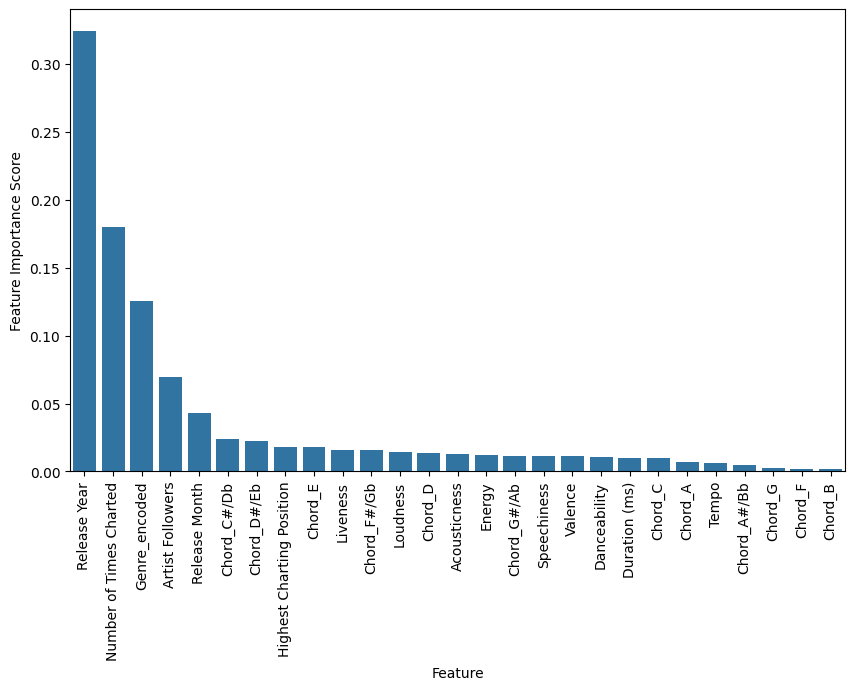

In [ ]:
feat_imp = pd.Series(xgbr.feature_importances_, index=X.columns).sort_values( ascending = False )
plt.figure(figsize = (10,6))
ax = sns.barplot(x = feat_imp.index, y = feat_imp.values )
ax.set_xticklabels( ax.get_xticklabels(), rotation = 90 )
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score') ;

In [ ]:
(feat_imp.sort_values( ascending = False )*100).cumsum()

####Feature Selection

In [ ]:
# Number of top features to use
top_n = 10

topxg_features = feat_imp.sort_values( ascending = False ).abs().sort_values(ascending=False).head(10).index

print("Top correlated features with Popularity:\n", topxg_features)

Top correlated features with Popularity:
 Index(['Release Year', 'Number of Times Charted', 'Genre_encoded',
       'Artist Followers', 'Release Month', 'Chord_C#/Db', 'Chord_D#/Eb',
       'Highest Charting Position', 'Chord_E', 'Liveness'],
      dtype='object')


In [ ]:
X_topxg = music_final[topxg_features]
y_topxg = music_final['Popularity']

params = model.best_params_

numLoops = 140
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train_topxg, X_test_topxg, y_train_topxg, y_test_topxg = train_test_split( X_topxg, y_topxg, test_size = 0.15 )
  xgbr = xgb.XGBRegressor(
      objective ='reg:squarederror',
      verbosity=0,
      **params,
      # learning_rate = 0.2,
      # max_depth = 3,
      # n_estimators = 100,
      seed = 10,
  )
  xgbr.fit(X_train_topxg,y_train_topxg)
  y_pred_xgb = xgbr.predict(X_test_topxg)
  mse_xgb[idx] = mean_squared_error(y_test_topxg,y_pred_xgb)

print(f'RMSE: {np.sqrt(mse_xgb).mean()*1000}')

RMSE: 2605.842914419564


## Data Visualization/Communication of Results


XGBoost outperforms both Decision Tree and Random Forest based on RMSE

Random Forest performs significantly better than a standalone Decision Tree, which is expected since Random Forest reduces overfitting by averaging multiple decision trees

Decision Tree lags behind the other two ensemble models, indicating that its simplicity comes at the cost of reduced predictive power